In [63]:
#import
import os
import gzip
from collections import Counter
#basics
import pandas as pd
import numpy as np

#plotting libraries
%matplotlib inline
import seaborn as sns
from seaborn import plt

# Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

#for AWS connection
#from boto.s3.connection import S3Connection
#from IPython.parallel import Client

#### Connect to data on local machine

In [64]:
train_df = pd.read_csv("/Users/rychughes/GA/data/train/base_features.csv")
print train_df.shape
train_df.head()

(311296, 44)


,repeattrue,repeattrips,id,offer_id,offer_value,purchases_total_quantity,purchases_total_amount,purchases_avg_price_per_item,purchases_quantity_30,purchases_quantity_60,...,brand_buy_true,brand_total_quantity,brand_total_amount,brand_share_wallet,brand_quantity_30,brand_quantity_60,brand_quantity_90,brand_amount_30,brand_amount_60,brand_amount_90
0,1,5,86246,1208251,2.00,1254,4140.41,3.301762,375,775,...,1,9,28.71,0.006934,1,5,6,4.59,14.95,20.64
1,1,16,86252,1197502,0.75,1308,4134.54,3.160963,826,859,...,1,2,4.98,0.001204,1,1,1,1.99,1.99,1.99
2,0,0,12262064,0,0.00,0,0.00,0.000000,0,0,...,0,0,0.00,0.000000,0,0,0,0.00,0.00,0.00
3,0,0,12277270,0,0.00,0,0.00,0.000000,0,0,...,0,0,0.00,0.000000,0,0,0,0.00,0.00,0.00
4,0,0,12332190,0,0.00,0,0.00,0.000000,0,0,...,0,0,0.00,0.000000,0,0,0,0.00,0.00,0.00


In [35]:
train_df.head(20)
#currently not generating any features when repeattrue == 0
# ==> all visuals will be biased and unaccurate
# ==> need to fix feature generation code!!!

,repeattrue,repeattrips,id,offer_id,offer_value,purchases_total_quantity,purchases_total_amount,purchases_avg_price_per_item,purchases_quantity_30,purchases_quantity_60,...,brand_buy_true,brand_total_quantity,brand_total_amount,brand_share_wallet,brand_quantity_30,brand_quantity_60,brand_quantity_90,brand_amount_30,brand_amount_60,brand_amount_90
0,1,5,86246,1208251,2.00,1254,4140.41,3.301762,375,775,...,1,9,28.71,0.006934,1,5,6,4.59,14.95,20.64
1,1,16,86252,1197502,0.75,1308,4134.54,3.160963,826,859,...,1,2,4.98,0.001204,1,1,1,1.99,1.99,1.99
2,0,0,12262064,0,0.00,0,0.00,0.000000,0,0,...,0,0,0.00,0.000000,0,0,0,0.00,0.00,0.00
3,0,0,12277270,0,0.00,0,0.00,0.000000,0,0,...,0,0,0.00,0.000000,0,0,0,0.00,0.00,0.00
4,0,0,12332190,0,0.00,0,0.00,0.000000,0,0,...,0,0,0.00,0.000000,0,0,0,0.00,0.00,0.00
5,0,0,12524696,0,0.00,0,0.00,0.000000,0,0,...,0,0,0.00,0.000000,0,0,0,0.00,0.00,0.00
6,0,0,12682470,1197502,0.75,77,340.57,4.422987,2,6,...,0,0,0.00,0.000000,0,0,0,0.00,0.00,0.00
7,0,0,12996040,1197502,0.75,27,110.68,4.099259,3,7,...,0,0,0.00,0.000000,0,0,0,0.00,0.00,0.00
8,0,0,13074629,0,0.00,0,0.00,0.000000,0,0,...,0,0,0.00,0.000000,0,0,0,0.00,0.00,0.00
9,0,0,13089312,1204821,1.50,86,251.17,2.920581,8,15,...,1,5,19.95,0.079428,2,5,5,7.98,19.95,19.95


In [65]:
cols = train_df.columns.values
print cols

['repeattrue' ' repeattrips' ' id ' ' offer_id' ' offer_value'
 ' purchases_total_quantity' ' purchases_total_amount'
 ' purchases_avg_price_per_item' ' purchases_quantity_30'
 ' purchases_quantity_60' ' purchases_quantity_90' ' purchases_amount_30'
 ' purchases_amount_60' ' purchases_amount_90' ' company_buy_true'
 ' company_total_quantity' ' company_total_amount' ' company_share_wallet'
 ' company_quantity_30' ' company_quantity_60' ' company_quantity_90'
 ' company_amount_30' ' company_amount_60' ' company_amount_90'
 ' category_buy_true' ' category_total_quantity' ' category_total_amount'
 ' category_share_wallet' ' category_quantity_30' ' category_quantity_60'
 ' category_quantity_90' ' category_amount_30' ' category_amount_60'
 ' category_amount_90' ' brand_buy_true' ' brand_total_quantity'
 ' brand_total_amount' ' brand_share_wallet' ' brand_quantity_30'
 ' brand_quantity_60' ' brand_quantity_90' ' brand_amount_30'
 ' brand_amount_60' ' brand_amount_90']


In [12]:
zero_transactions_mask = list(train_df[' purchase_total_quantity'] == 0)
zero_transactions_mask

[False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 Fals

In [15]:
Counter(repeat_false_mask)

Counter({True: 267871, False: 43425})

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311296 entries, 0 to 311295
Data columns (total 44 columns):
repeattrue                       311296 non-null float64
 repeattrips                     311296 non-null float64
 id                              311296 non-null int64
 offer_id                        311296 non-null int64
 offer_value                     311296 non-null float64
 purchases_total_quantity        311296 non-null float64
 purchases_total_amount          311296 non-null float64
 purchases_avg_price_per_item    311296 non-null float64
 purchases_quantity_30           311296 non-null float64
 purchases_quantity_60           311296 non-null float64
 purchases_quantity_90           311296 non-null float64
 purchases_amount_30             311296 non-null float64
 purchases_amount_60             311296 non-null float64
 purchases_amount_90             311296 non-null float64
 company_buy_true                311296 non-null int64
 company_total_quantity          311296 

In [62]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
repeattrue,311296,1.394975e-01,3.464654e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
repeattrips,311296,3.373959e-01,4.877307e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.124000e+03
id,311296,2.109791e+09,1.618401e+09,86246.000000,5.566205e+08,1.953395e+09,3.692851e+09,4.853461e+09
offer_id,311296,6.180161e+05,6.007613e+05,0.000000,0.000000e+00,1.194044e+06,1.200581e+06,1.208503e+06
offer_value,311296,6.454412e-01,7.315519e-01,0.000000,0.000000e+00,7.500000e-01,1.000000e+00,3.000000e+00
purchases_total_quantity,311296,7.640496e+01,3.257303e+03,0.000000,0.000000e+00,1.000000e+01,9.500000e+01,1.458758e+06
purchases_total_amount,311296,2.663150e+02,9.767568e+03,-371.690000,0.000000e+00,3.102000e+01,3.321325e+02,3.982989e+06
purchases_avg_price_per_item,311296,1.858482e+00,1.989205e+00,-10.619714,0.000000e+00,1.972202e+00,3.464157e+00,2.500000e+01
purchases_quantity_30,311296,5.300910e+00,2.041233e+02,-7.000000,0.000000e+00,0.000000e+00,6.000000e+00,8.333000e+04
purchases_quantity_60,311296,1.122020e+01,4.326968e+02,-1.000000,0.000000e+00,0.000000e+00,1.400000e+01,1.685030e+05


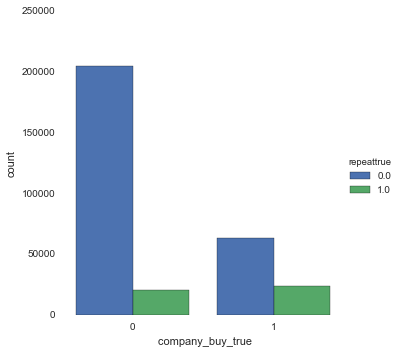

In [32]:
#train_df[' company_buy_true'].hist()
#note the space between "_varName"
sns.factorplot(" company_buy_true",data=train_df, hue="repeattrue", aspect=1)

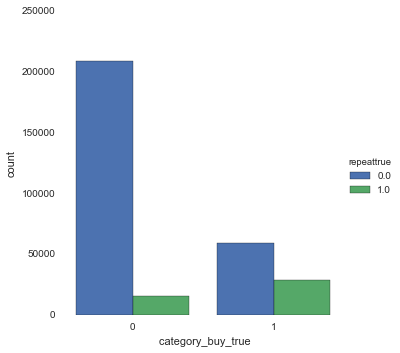

In [33]:
sns.factorplot(" category_buy_true",data=train_df, hue="repeattrue", aspect=1)

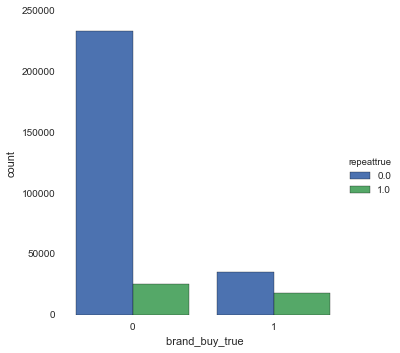

In [34]:
sns.factorplot(" brand_buy_true",data=train_df, hue="repeattrue", aspect=1)

In [36]:
train_df.corr()

,repeattrue,repeattrips,id,offer_id,offer_value,purchases_total_quantity,purchases_total_amount,purchases_avg_price_per_item,purchases_quantity_30,purchases_quantity_60,...,brand_buy_true,brand_total_quantity,brand_total_amount,brand_share_wallet,brand_quantity_30,brand_quantity_60,brand_quantity_90,brand_amount_30,brand_amount_60,brand_amount_90
repeattrue,1.000000,0.171812,-0.030751,0.392091,0.314768,0.020720,0.023859,0.367635,0.023262,0.022967,...,0.265679,0.032599,0.037411,0.152153,0.050811,0.048309,0.047903,0.065246,0.058836,0.058235
repeattrips,0.171812,1.000000,0.002117,0.067446,0.048711,0.269079,0.242259,0.063213,0.372087,0.368573,...,0.063868,0.149069,0.155227,0.044927,0.128647,0.127428,0.119470,0.154583,0.145674,0.139508
id,-0.030751,0.002117,1.000000,-0.152401,-0.147452,-0.005474,-0.005819,-0.102526,-0.004581,-0.004313,...,-0.067448,-0.003961,-0.002983,-0.016236,-0.001262,-0.001612,-0.002003,0.000889,0.000456,0.000440
offer_id,0.392091,0.067446,-0.152401,1.000000,0.858824,0.022843,0.026552,0.908360,0.025278,0.025238,...,0.441856,0.032718,0.035561,0.236081,0.041615,0.040301,0.040689,0.050109,0.045561,0.046049
offer_value,0.314768,0.048711,-0.147452,0.858824,1.000000,0.023646,0.027277,0.782632,0.025842,0.025856,...,0.547444,0.037569,0.042368,0.268959,0.041144,0.040722,0.041816,0.050890,0.047468,0.048283
purchases_total_quantity,0.020720,0.269079,-0.005474,0.022843,0.023646,1.000000,0.987958,0.019187,0.970380,0.949770,...,0.023738,0.866264,0.886187,0.004722,0.562768,0.638514,0.692249,0.640562,0.686308,0.737952
purchases_total_amount,0.023859,0.242259,-0.005819,0.026552,0.027277,0.987958,1.000000,0.026208,0.950814,0.932611,...,0.027078,0.873233,0.874985,0.005211,0.573618,0.644757,0.702667,0.640827,0.684403,0.736460
purchases_avg_price_per_item,0.367635,0.063213,-0.102526,0.908360,0.782632,0.019187,0.026208,1.000000,0.021228,0.021177,...,0.403670,0.027684,0.033174,0.206641,0.036749,0.034906,0.035367,0.048726,0.043791,0.044108
purchases_quantity_30,0.023262,0.372087,-0.004581,0.025278,0.025842,0.970380,0.950814,0.021228,1.000000,0.995037,...,0.026578,0.850501,0.891225,0.005799,0.619541,0.697882,0.731324,0.710351,0.760398,0.791564
purchases_quantity_60,0.022967,0.368573,-0.004313,0.025238,0.025856,0.949770,0.932611,0.021177,0.995037,1.000000,...,0.026090,0.836558,0.881927,0.005696,0.625875,0.709102,0.736183,0.721909,0.779300,0.802315


2.23595505618


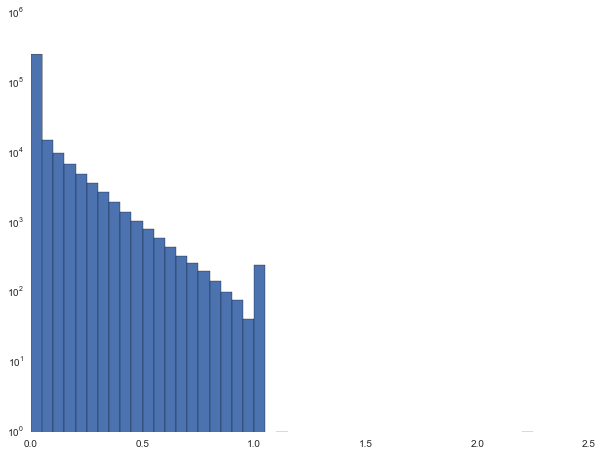

In [46]:
print max( train_df[' category_share_wallet'])
train_df[' category_share_wallet'].hist( bins=50, range=(0,2.5), log=True)

In [47]:
#how to get index value for my outliers (above 1)?

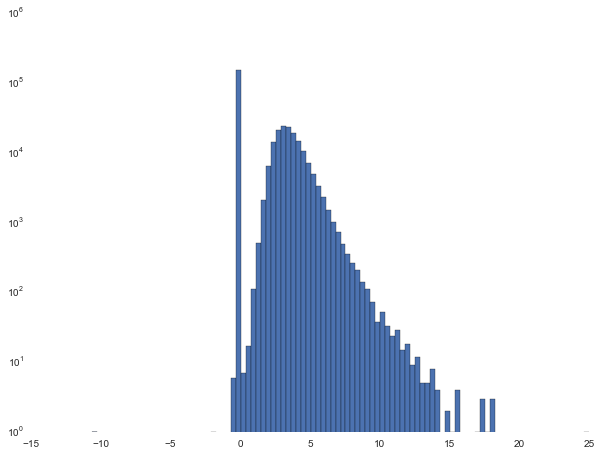

In [50]:
train_df[' purchases_avg_price_per_item'].hist( bins=100, log=True)

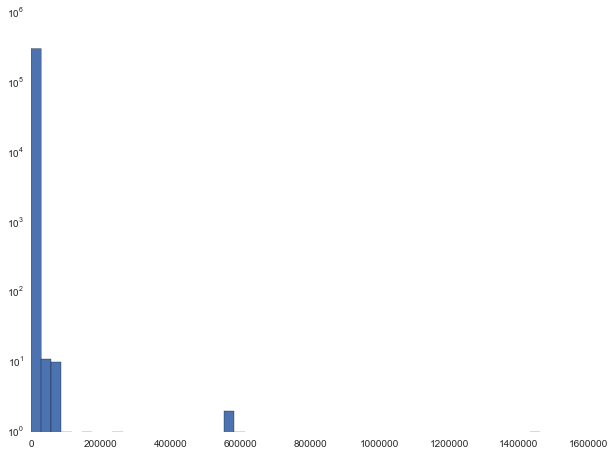

In [54]:
train_df[' purchases_total_quantity'].hist( bins=50, log=True)

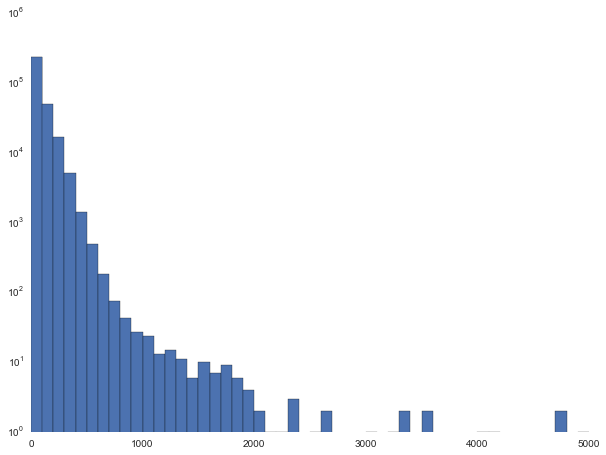

In [58]:
train_df[' purchases_total_quantity'].hist( bins=50, log=True, range=(0,5000))

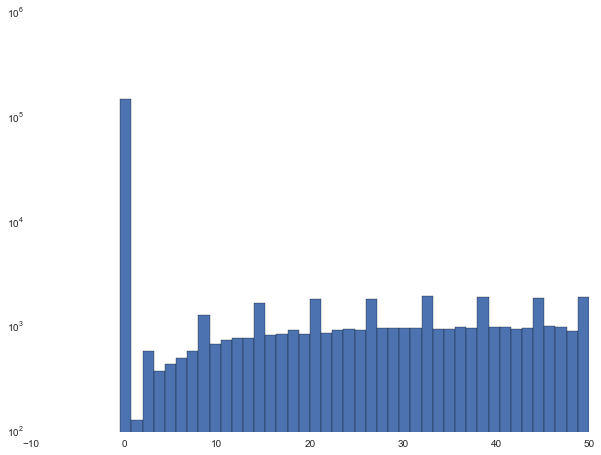

In [61]:
train_df[' purchases_total_quantity'].hist( bins=50, log=True, range=(-10,50))
#does this indicate that I can delete a good share of my dataset?

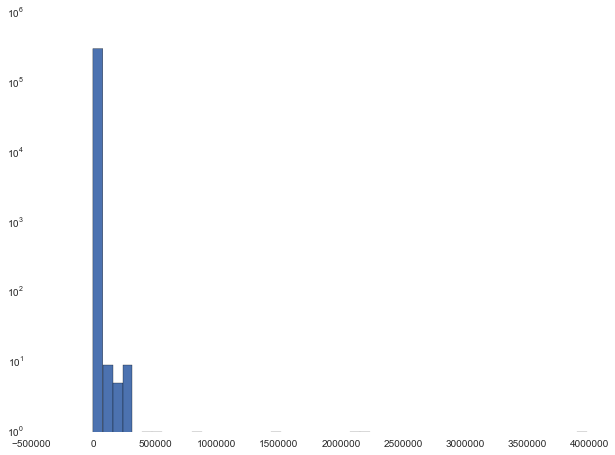

In [60]:
train_df[' purchases_total_amount'].hist( bins=50, log=True)